# Bike Sharing Assignment

#### Problem Statement:

A US bike-sharing provider BoomBikes has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. So, it has decided to come up with a mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown comes to an end, and the economy restores to a healthy state. In such an attempt, BoomBikes aspires to understand the demand for shared bikes among the people after this ongoing quarantine situation ends across the nation due to Covid-19.

They have contracted a consulting company to understand the factors on which the demand for these shared bikes depends. Specifically, they want to understand the factors affecting the demand for these shared bikes in the American market. The company wants to know:

- Which variables are significant in predicting the demand for shared bikes.
- How well those variables describe the bike demands
Based on various meteorological surveys and people's styles, the service provider firm has gathered a large dataset on daily bike demands across the American market based on some factors. 

## Step 1: Reading and Understanding the Data

Let us first import NumPy and Pandas and read the dataset

In [1096]:
# Supress Warnings

import warnings
warnings.filterwarnings('ignore')

In [1097]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly.express as px

In [1098]:
bike = pd.read_csv('day.csv', sep=',',skipinitialspace=True)

In [1099]:
# Check the head of the dataset

bike.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


Inspect the various aspects of the dataframe

In [1100]:
bike.shape

(730, 16)

In [1101]:
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


#### Removing the following mentioned columns:
- instant: irrelevant
- temp: using atemp instead of temp
- casual and registered: since casual+registered=cnt

In [1102]:
# dropping columns 'instant','temp','casual','registered'

bike = bike.drop(columns=['instant','temp','casual','registered'],axis=1)

In [1103]:
# Extracting day from dteday since month and year are provided in different column

bike['dteday']=pd.to_datetime(bike['dteday'])
bike['dteday']=bike['dteday'].dt.day

In [1104]:
bike.head()

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,atemp,hum,windspeed,cnt
0,1,1,0,1,0,6,0,2,18.18125,80.5833,10.749882,985
1,1,1,0,1,0,0,0,2,17.68695,69.6087,16.652113,801
2,1,1,0,1,0,1,1,1,9.47025,43.7273,16.636703,1349
3,1,1,0,1,0,2,1,1,10.60610,59.0435,10.739832,1562
4,1,1,0,1,0,3,1,1,11.46350,43.6957,12.522300,1600


#### Converting following columns to categorical string so that the data makes sense:
- season : season (1:spring, 2:summer, 3:fall, 4:winter)
- weathersit : weathersit (1:clear, 2:misty, 3:light rain, 4:heavy rain)

In [1105]:
bike['season']=bike.season.map({1:'spring', 2:'summer', 3:'fall', 4:'winter'})
bike['weathersit']=bike.weathersit.map({1:'clear', 2:'misty', 3:'light rain', 4:'heavy rain'})

In [1106]:
bike.head()

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,atemp,hum,windspeed,cnt
0,1,spring,0,1,0,6,0,misty,18.18125,80.5833,10.749882,985
1,1,spring,0,1,0,0,0,misty,17.68695,69.6087,16.652113,801
2,1,spring,0,1,0,1,1,clear,9.47025,43.7273,16.636703,1349
3,1,spring,0,1,0,2,1,clear,10.60610,59.0435,10.739832,1562
4,1,spring,0,1,0,3,1,clear,11.46350,43.6957,12.522300,1600


In [1107]:
bike.describe()

,dteday,yr,mnth,holiday,weekday,workingday,atemp,hum,windspeed,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,15.720548,0.500000,6.526027,0.028767,2.997260,0.683562,23.726322,62.765175,12.763620,4508.006849
std,8.802278,0.500343,3.450215,0.167266,2.006161,0.465405,8.150308,14.237589,5.195841,1936.011647
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,3.953480,0.000000,1.500244,22.000000
25%,8.000000,0.000000,4.000000,0.000000,1.000000,0.000000,16.889713,52.000000,9.041650,3169.750000
50%,16.000000,0.500000,7.000000,0.000000,3.000000,1.000000,24.368225,62.625000,12.125325,4548.500000
75%,23.000000,1.000000,10.000000,0.000000,5.000000,1.000000,30.445775,72.989575,15.625589,5966.000000
max,31.000000,1.000000,12.000000,1.000000,6.000000,1.000000,42.044800,97.250000,34.000021,8714.000000


#### Outlier analysis

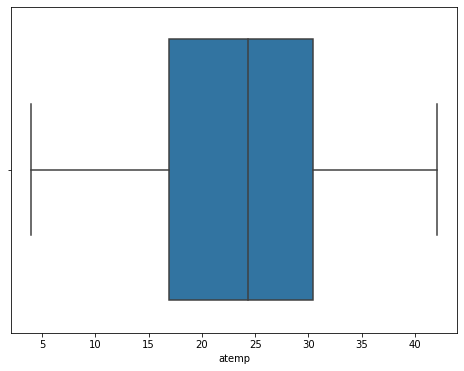

In [1108]:
# atemp

plt.figure(figsize=(8, 6))
sns.boxplot(bike.atemp)
plt.show()

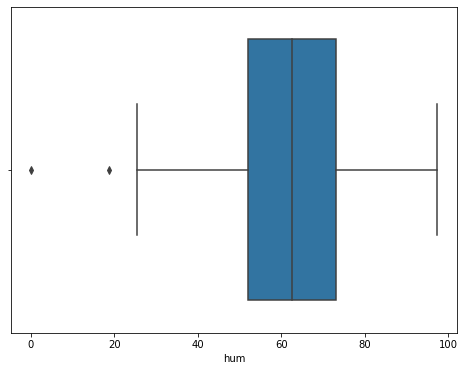

In [1109]:
# hum

plt.figure(figsize=(8, 6))
sns.boxplot(bike.hum)
plt.show()

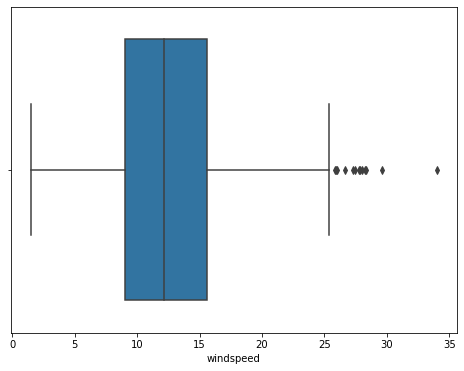

In [1110]:
# windspeed

plt.figure(figsize=(8, 6))
sns.boxplot(bike.windspeed)
plt.show()

Since the distribution of continuous variables seems fine, no need for outlier treatment.

## Step 2: Visualizing the Data

### Univariate:

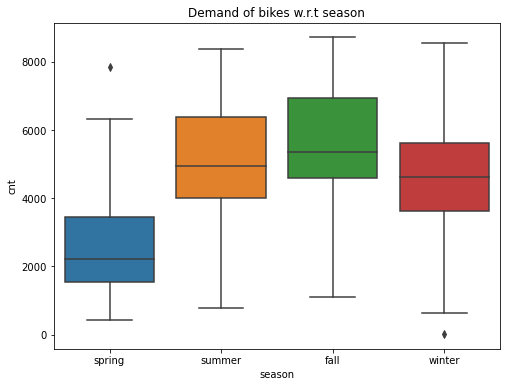

In [1111]:
# cnt w.r.t. season

plt.figure(figsize=(8, 6))
plt.title("Demand of bikes w.r.t season")
sns.boxplot(x = 'season', y = 'cnt', data = bike)
plt.show()

- Fall and summer season shows high demand in bikes.

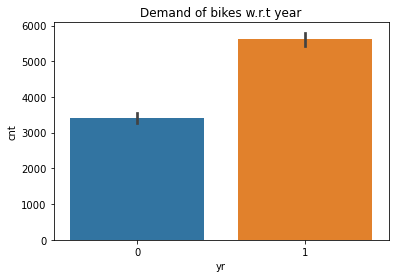

In [1112]:
# cnt w.r.t. yr

plt.figure(figsize=(6, 4))
plt.title("Demand of bikes w.r.t year")
sns.barplot(data=bike,x='yr',y='cnt')
plt.show()

- Demand for bikes was more in 2019 as compared to 2018.

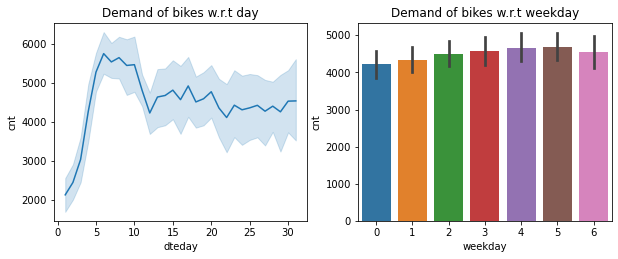

In [1116]:
# cnt w.r.t. yr

plt.figure(figsize=(10, 8))
plt.subplot(221)
plt.title("Demand of bikes w.r.t day")
sns.lineplot(data=bike,x='dteday',y='cnt')

plt.subplot(222)
plt.title("Demand of bikes w.r.t weekday")
sns.barplot(data=bike,x='weekday',y='cnt')
plt.show()

- Demand increases gradually on start of month but decreases and stay constant for rest of the month.
- Demand increase from monday to thursday and decreases gradually through friday and weekends.

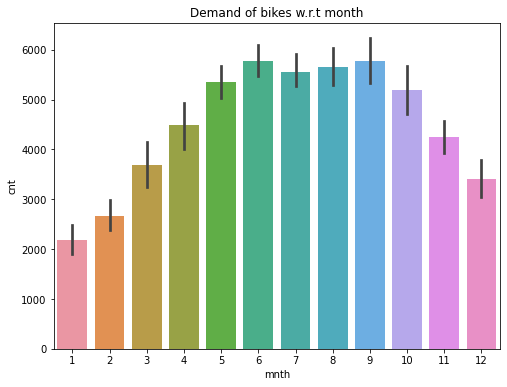

In [1056]:
# cnt w.r.t. mnth

plt.figure(figsize=(8, 6))
plt.title("Demand of bikes w.r.t month")
sns.barplot(data=bike,x='mnth',y='cnt')
plt.show()

- From June to September, demand for bike was high.

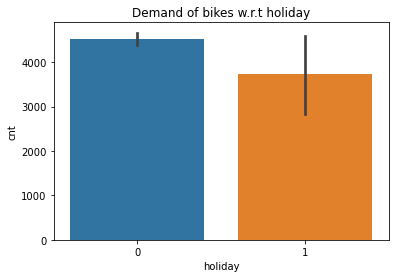

In [1057]:
# cnt w.r.t. holiday

plt.figure(figsize=(6, 4))
plt.title("Demand of bikes w.r.t holiday")
sns.barplot(data=bike,x='holiday',y='cnt')
plt.show()

- Demand for bike is less on holidays.

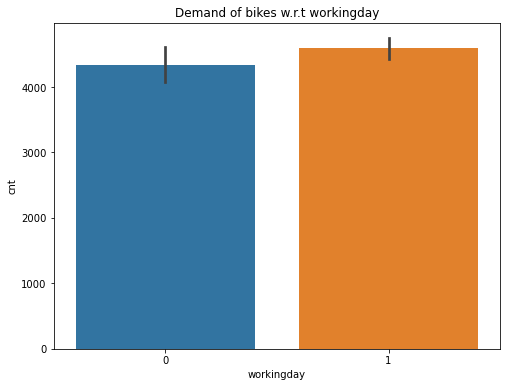

In [1058]:
# cnt w.r.t. workingday

plt.figure(figsize=(8, 6))
plt.title("Demand of bikes w.r.t workingday")
sns.barplot(data=bike,x='workingday',y='cnt')
plt.show()

- Demand for bikes are less on weekends.

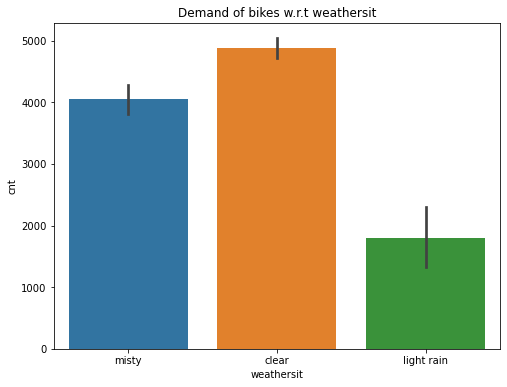

In [1059]:
# cnt w.r.t. weathersit

plt.figure(figsize=(8, 6))
plt.title("Demand of bikes w.r.t weathersit")
sns.barplot(data=bike,x='weathersit',y='cnt')
plt.show()

- Demand for bikes is higher on clear weather.

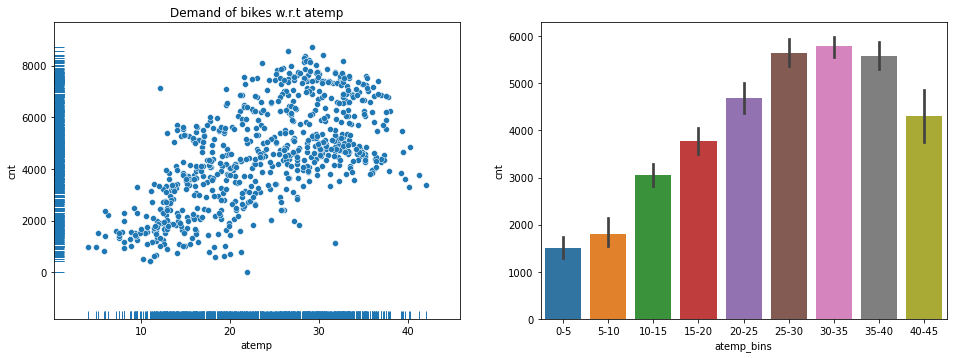

In [1060]:
# cnt w.r.t. atemp

plt.figure(figsize=(16, 12))
plt.subplot(221)
plt.title("Demand of bikes w.r.t atemp")
sns.scatterplot(data=bike,x='atemp',y='cnt')
sns.rugplot(data=bike,x='atemp',y='cnt')

plt.subplot(222)
bike['atemp_bins']= pd.cut(bike['atemp'], bins=9,precision =0,labels=['0-5','5-10','10-15','15-20','20-25','25-30','30-35','35-40','40-45'])
sns.barplot(data=bike,x='atemp_bins',y='cnt')
plt.show()

- There is somewhat a linear trend between atemp and demand of bikes.

### Bivariate

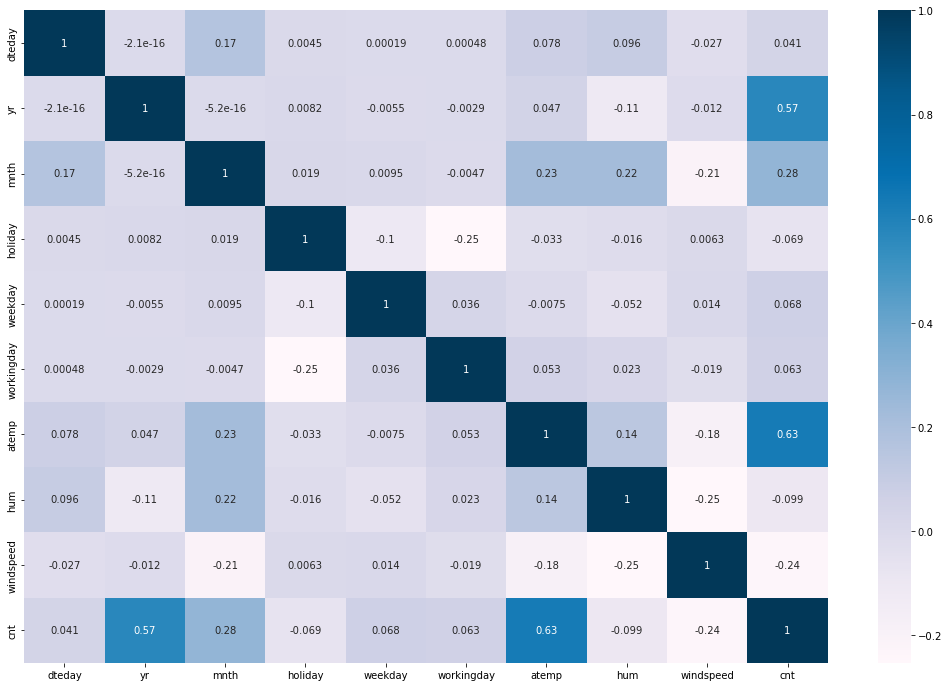

In [1061]:
# Heatmap

plt.figure(figsize=(18,12))
sns.heatmap(bike.corr(), annot=True, cmap='PuBu')
plt.show()

In [1062]:
# Demand varying with year and atemp

fig=px.scatter(bike,y='atemp',x='cnt',color='yr',title='Variation in demand of bikes in 2018 & 2019 w.r.t atemp')
fig.show()

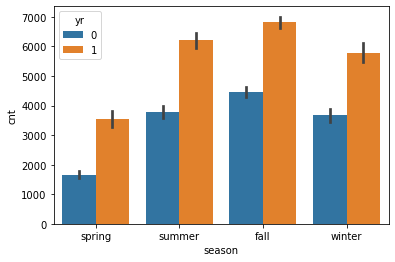

In [1063]:
# demand varying with season w.r.t. year 2018 and 2019

sns.barplot(data=bike, x='season', y='cnt', hue='yr')
plt.show()

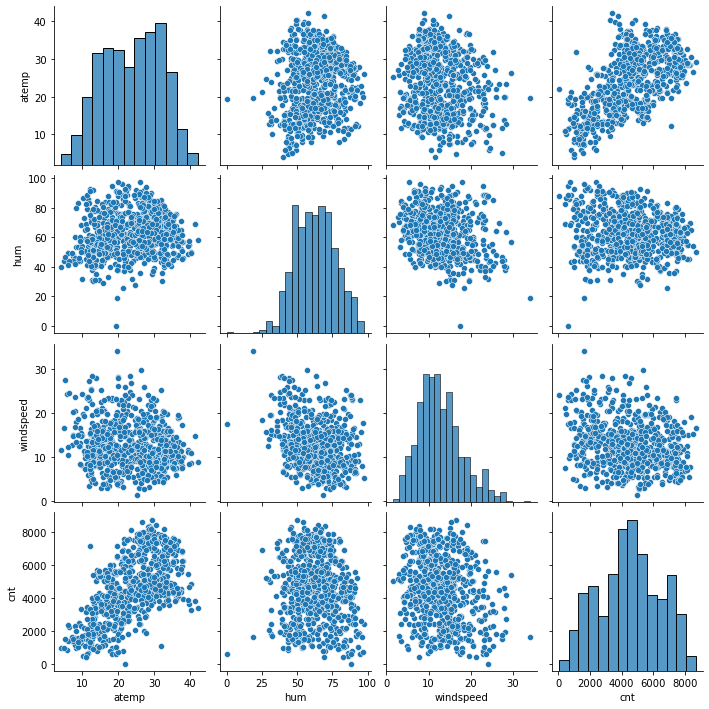

In [1064]:
# pairplot for continuous variable

col=['atemp','hum','windspeed','cnt']
sns.pairplot(bike[col])
plt.show()

- as can be seen in pairplot, only atemp has a linear variance with cnt.

## Step 3: Data Preparation

In [1065]:
# Dropping atemp_bins

bike=bike.drop(columns='atemp_bins',axis=1)

In [1066]:
bike.head()

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,atemp,hum,windspeed,cnt
0,1,spring,0,1,0,6,0,misty,18.18125,80.5833,10.749882,985
1,1,spring,0,1,0,0,0,misty,17.68695,69.6087,16.652113,801
2,1,spring,0,1,0,1,1,clear,9.47025,43.7273,16.636703,1349
3,1,spring,0,1,0,2,1,clear,10.60610,59.0435,10.739832,1562
4,1,spring,0,1,0,3,1,clear,11.46350,43.6957,12.522300,1600


#### Dummy Variables

In [1067]:
# encoding season and weathersit using pd.get_dummies since they are nominal variable

Season =pd.get_dummies(bike['season'], drop_first=True)
Weathersit = pd.get_dummies(bike['weathersit'], drop_first=True)
bike=pd.concat([bike,Season,Weathersit], axis=1)

In [1068]:
bike.head()

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,atemp,hum,windspeed,cnt,spring,summer,winter,light rain,misty
0,1,spring,0,1,0,6,0,misty,18.18125,80.5833,10.749882,985,1,0,0,0,1
1,1,spring,0,1,0,0,0,misty,17.68695,69.6087,16.652113,801,1,0,0,0,1
2,1,spring,0,1,0,1,1,clear,9.47025,43.7273,16.636703,1349,1,0,0,0,0
3,1,spring,0,1,0,2,1,clear,10.60610,59.0435,10.739832,1562,1,0,0,0,0
4,1,spring,0,1,0,3,1,clear,11.46350,43.6957,12.522300,1600,1,0,0,0,0


In [1069]:
# drop season and weathersit since we have encoded them

bike=bike.drop(columns=['season','weathersit'],axis=1)

In [1070]:
bike.head()

,dteday,yr,mnth,holiday,weekday,workingday,atemp,hum,windspeed,cnt,spring,summer,winter,light rain,misty
0,1,0,1,0,6,0,18.18125,80.5833,10.749882,985,1,0,0,0,1
1,1,0,1,0,0,0,17.68695,69.6087,16.652113,801,1,0,0,0,1
2,1,0,1,0,1,1,9.47025,43.7273,16.636703,1349,1,0,0,0,0
3,1,0,1,0,2,1,10.60610,59.0435,10.739832,1562,1,0,0,0,0
4,1,0,1,0,3,1,11.46350,43.6957,12.522300,1600,1,0,0,0,0


## Step 4: Splitting into Training and Test Set

In [1071]:
# splitting into bike_train and bike_test

from sklearn.model_selection import train_test_split
bike_train,bike_test= train_test_split(bike,train_size=0.7,test_size=0.3,random_state=100)

In [1072]:
# checking bike_train shape

bike_train.shape

(510, 15)

In [1073]:
# checking bike_train shape

bike_test.shape

(219, 15)

#### Scaling using MinMaxScaler

In [1074]:
# scaling columns 'dteday','mnth','weekday','atemp','hum','windspeed','cnt'

from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
col=['dteday','mnth','weekday','atemp','hum','windspeed','cnt']
bike_train[col]=scaler.fit_transform(bike_train[col]) #using fit_transform to scale training set

In [1075]:
bike_train.describe()

,dteday,yr,mnth,holiday,weekday,workingday,atemp,hum,windspeed,cnt,spring,summer,winter,light rain,misty
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.00000,510.000000,510.000000
mean,0.488366,0.507843,0.504456,0.025490,0.498366,0.676471,0.512989,0.650369,0.320768,0.513620,0.243137,0.245098,0.24902,0.029412,0.343137
std,0.294747,0.500429,0.315338,0.157763,0.336182,0.468282,0.212385,0.145882,0.169797,0.224593,0.429398,0.430568,0.43287,0.169124,0.475223
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,0.233333,0.000000,0.181818,0.000000,0.166667,0.000000,0.332086,0.538643,0.199179,0.356420,0.000000,0.000000,0.00000,0.000000,0.000000
50%,0.500000,1.000000,0.545455,0.000000,0.500000,1.000000,0.526811,0.653714,0.296763,0.518638,0.000000,0.000000,0.00000,0.000000,0.000000
75%,0.733333,1.000000,0.818182,0.000000,0.833333,1.000000,0.688457,0.754830,0.414447,0.684710,0.000000,0.000000,0.00000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000


#### Dividing into X and Y sets for model Building

In [1076]:
# y-cnt, x-remaining dataframe

y_train=bike_train.pop('cnt')
X_train=bike_train

## Step 5: Building the model

#### RFE

In [1077]:
# Importing RFE and LinearRegression

from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [1078]:
lm = LinearRegression()
lm.fit(X_train, y_train)
rfe = RFE(estimator=lm, n_features_to_select= 10)             # running RFE
rfe = rfe.fit(X_train, y_train)

In [1079]:
#Ranking by RFE

list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('dteday', False, 5),
 ('yr', True, 1),
 ('mnth', False, 4),
 ('holiday', True, 1),
 ('weekday', True, 1),
 ('workingday', False, 3),
 ('atemp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('spring', True, 1),
 ('summer', False, 2),
 ('winter', True, 1),
 ('light rain', True, 1),
 ('misty', True, 1)]

In [1080]:
# columns selected after RFE

col = X_train.columns[rfe.support_]
col

Index(['yr', 'holiday', 'weekday', 'atemp', 'hum', 'windspeed', 'spring',
       'winter', 'light rain', 'misty'],
      dtype='object')

In [1081]:
#columns not selected after RFE

X_train.columns[~rfe.support_]

Index(['dteday', 'mnth', 'workingday', 'summer'], dtype='object')

#### Building model using statsmodel, for the detailed statistics

In [1082]:
# Creating X_train dataframe with RFE selected variables

X_train_rfe=X_train[col]

In [1083]:
#adding constant var
import statsmodels.api as sm
X_train_rfe=sm.add_constant(X_train_rfe)
lm_1=sm.OLS(y_train,X_train_rfe).fit()

In [1084]:
lm_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.827
Model:                            OLS   Adj. R-squared:                  0.824
Method:                 Least Squares   F-statistic:                     239.0
Date:                Wed, 02 Nov 2022   Prob (F-statistic):          4.18e-183
Time:                        13:19:59   Log-Likelihood:                 486.30
No. Observations:                 510   AIC:                            -950.6
Df Residuals:                     499   BIC:                            -904.0
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3077      0.033      9.242      0.000       0.242       0.373
yr             0.2344      0.008     27.647      0.000       0.218       0.251
holiday       -0.0749      0.027     -2.797      0.005      -0.127      -0.022
weekday        0.0492      0.013      3.906      0.000       0.024       0.074
atemp          0.4586      0.031     14.601      0.000       0.397       0.520
hum           -0.1159      0.039     -2.955      0.003      -0.193      -0.039
windspeed     -0.1556      0.027     -5.843      0.000      -0.208      -0.103
spring        -0.1228      0.015     -8.032      0.000      -0.153      -0.093
winter         0.0474      0.013      3.761      0.000       0.023       0.072
light rain    -0.2482      0.028     -9.011      0.000      -0.302      -0.194
misty         -0.0592      0.011     -5.369      0.000      -0.081      -0.038
==============================================================================
Omnibus:                       81.599   Durbin-Watson:                   2.032
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              204.241
Skew:                          -0.813   Prob(JB):                     4.46e-45
Kurtosis:                       5.640   Cond. No.                         19.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [1085]:
# Calculate the VIFs for the model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,63.61
4,atemp,2.55
7,spring,2.47
5,hum,1.88
8,winter,1.71
10,misty,1.57
9,light rain,1.24
6,windspeed,1.17
1,yr,1.03
3,weekday,1.03


- Note: Conceptually, it does not matter if we add or remove constant from VIF calculation as the constant is not a predictor.

## Step 6: Residual Analysis:

In [1086]:
# making prediction on training set

y_train_pred=lm_1.predict(X_train_rfe)

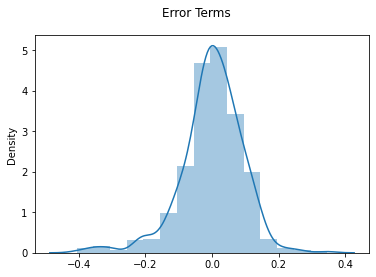

In [1087]:
# plotting histogram for error terms

fig=plt.figure()
res=y_train-y_train_pred
sns.distplot(res,bins=15)
fig.suptitle('Error Terms')
plt.show()

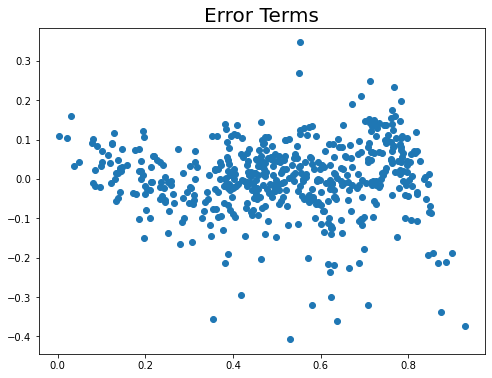

In [1088]:
#plotting scatter plot for error terms

plt.figure(figsize=(8,6))
plt.scatter(y_train_pred,res)
plt.title('Error Terms', fontsize=20)              # Plot heading 
plt.show()

<Figure size 1296x1440 with 0 Axes>

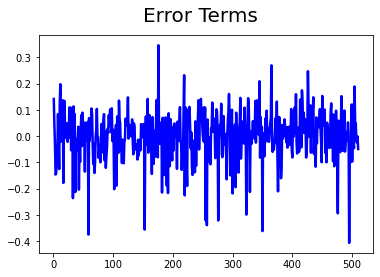

In [1089]:
# plotting lineplot for error terms

plt.figure(figsize=(18, 20))
c = [i for i in range(1,511,1)]
fig = plt.figure()
plt.plot(c,res, color="blue", linewidth=2.5, linestyle="-")
fig.suptitle('Error Terms', fontsize=20)              # Plot heading 
plt.show()

#### Inference:
- error terms have normal distribution with mean=0.
- there is no pattern in error terms, which confirms homoscedasticity.
- line plot shows residuals are independent.

## Step 7: Making prediction on test set

#### Applying the scaling on the test sets

In [1090]:
col=['dteday','mnth','weekday','atemp','hum','windspeed','cnt']
bike_test[col]=scaler.transform(bike_test[col])

#### Dividing into X_test and y_test

In [1091]:
y_test = bike_test.pop('cnt')
X_test = bike_test

In [1092]:
# Now let's use our model to make predictions.

X_train_rfe=X_train_rfe.drop('const',1)

# Creating X_test_new dataframe by dropping variables from X_test
X_test_rfe = X_test[X_train_rfe.columns]

# Adding a constant variable 
X_test_rfe = sm.add_constant(X_test_rfe)

In [1093]:
# Making predictions

y_test_pred = lm_1.predict(X_test_rfe)

## Step 8: Model Evaluation

Text(0, 0.5, 'y_test_pred')

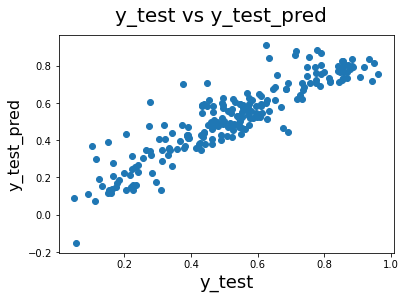

In [1094]:
# Plotting y_test and y_pred to understand the spread.

fig = plt.figure()
plt.scatter(y_test,y_test_pred)
fig.suptitle('y_test vs y_test_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_test_pred', fontsize=16)                          # Y-label

In [1095]:
# R2 Score

from sklearn.metrics import r2_score
r2_score(y_true=y_test,y_pred=y_test_pred)

0.8131525295331143

#### Model Equation
- cnt=0.3077+(0.2344*yr)-(0.0749*holiday)+(0.0492*weekday)+(0.4586*atemp)-(0.1159*hum)-(0.1556*windspeed)-(0.1228*spring)+(0.0474*winter)-(0.2482*light rain)-(0.0592*misty)

#### Inference:
- Demand for shared bike is going to increase with year.
- Demand decreases on holidays.
- Demand increases on weekdays.
- Demand increases with temperature, also could be seen high in summer and early fall in EDA.
- Demand decreases with increase in humidity and windspeed.
- Demand decreases in spring but increases in winter too.
- Demand decreases when there is light rain or mist.